#### 성적데이터 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(
    {'시간' : [2,4,8,9],
     '성적' : [20,40,80,90]}
)
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


w와 b를 찾는 방법
- 최소제곱법 : 수학적 공식을 이용한 해석적 방법 
- 경사하강법 : w와 b값의 변화에 따른 오차값의 기울기를 이용하여 찾는 방법

최소제곱법이 적용된 sklearn 모델 사용해보기!

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# 모델 생성
lr_rg = LinearRegression() # 하이퍼파라미터 없음  

In [8]:
# 학습 
lr_rg.fit(data[['시간']], data['성적'])

LinearRegression()

In [14]:
# 예측
lr_rg.predict([[7]])

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [16]:
# 가중치(w), 절편(b) 확인
lr_rg.coef_ # 가중치

array([10.])

In [18]:
lr_rg.intercept_ 

7.105427357601002e-15

#### 경사하강법(Gradient Descent)
1. 파라미터(w,b) 초기화 : 임의의 값으로
2. 예측 : 현재 w와 b를 사용해서 예측을 수행
3. 오차 계산 : 예측값과 실제값 사이의 오차 계산 -> MSE
4. 비용함수의 기울기 계산 : 오차값이 낮아지는 방향을 찾기 위해서, w와 mse간의 기울기 값을 계산
5. 파라미터 업데이트 : 기울기와 학습률을 사용해서 업데이트

In [19]:
# 가설함수 정의
# 예측값 
def h(w,x):
    return w*x + 0

In [20]:
# MSE(평균제곱오차) : 손실함수, 비용함수
def cost(data, target, weight): # 특성(시간), 실제값(실제 성적), 가중치
    y_pred = h(weight,data)
    mse = ((target - y_pred)**2).mean()
    return mse

In [25]:
# Mse 
cost(data['시간'], data['성적'], 10)

0.0

- w값에 따른 mse변화율 그려보기

In [26]:
# x축의 범위
w_arr = range(-10, 31) # -10 ~ 30

In [28]:
cost_list = [] # 비용함수 MSE를 담아줄 리스트
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)  

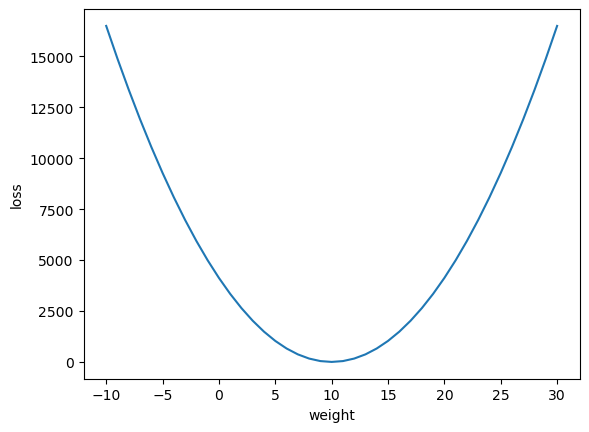

In [30]:
plt.plot(w_arr, cost_list)
plt.xlabel('weight')
plt.ylabel('loss')
plt.show()

In [31]:
# 경사하강법이 적용된 모델 
from sklearn.linear_model import SGDRegressor

In [33]:
# 모델 초기화(생성)
sgd_rg = SGDRegressor(
    eta0 = 0.01, # 학습률 (기울기의 보폭)
    max_iter = 5000, # w값을 업데이트 하는 횟수를 최대 5000번까지 수행
    verbose = 1 # 학습 진행 현황 출력
    
)

In [35]:
# 학습
sgd_rg.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 8.46, NNZs: 1, Bias: 1.235076, T: 4, Avg. loss: 904.396320
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.48, NNZs: 1, Bias: 1.358276, T: 8, Avg. loss: 21.977231
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.71, NNZs: 1, Bias: 1.381458, T: 12, Avg. loss: 1.679243
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.78, NNZs: 1, Bias: 1.386415, T: 16, Avg. loss: 0.335994
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.383616, T: 20, Avg. loss: 0.217163
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.80, NNZs: 1, Bias: 1.378491, T: 24, Avg. loss: 0.202548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.374127, T: 28, Avg. loss: 0.203541
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.82, NNZs: 1, Bias: 1.370656, T: 32, Avg. loss: 0.198236
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.365971, T: 36, Avg. loss: 0.197547
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=5000, verbose=1)

In [38]:
# 가중치와 절편 확인
sgd_rg.coef_, sgd_rg.intercept_

(array([9.84595885]), array([1.10704815]))

In [41]:
# 성능 확인
sgd_rg.score(data[['시간']], data['성적']) #r2 score
# 회귀 평가 지표(오차값, 데이터의 분포를 잘 이해하고 있는가?)
# 분류 평가 지표(얼마나 잘 맞췄는가?)

0.9997028918127452